# Exercise 2: Rigid and perspective transformations in homogeneous coordinates

In [12]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
import itertools as it
print(cv2.__version__)

4.7.0


## Previous Code (Week 1)

Text(0.5, 0, 'Z')

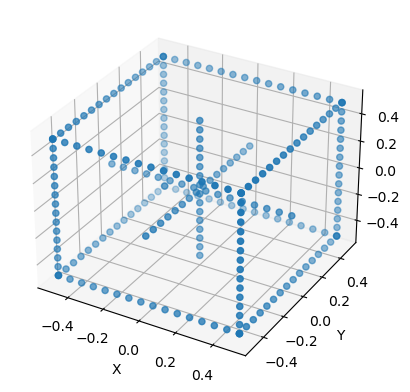

In [13]:
#Exercise 1.11

def box3d(n=16):
    points=[]
    N = tuple(np.linspace(-1,1,n))
    for i, j in [(-1,-1), (-1,1), (1,1), (0,0)]:
        points.extend(set(it.permutations([(i, )*n, (j, )*n, N])))
    
    return np.hstack(points)/2

sample = box3d()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot 3D box
ax.scatter(sample[0], sample[1], sample[2])


# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

In [14]:
#Exercise 1.12

def Pi(p): #converts from homogeneous to inhomogeneous
    q = p[:-1]/p[-1]

    return q

def PiInv(q): #inhomogeneous to homogeneous
    p= np.vstack((q, np.ones(q.shape[1]))) #stack the inhomogenous with (1, )*n
    return(p)

ph = np.array([[1, 2, 3], [4, 5, 6], [4, 5, 9]])

q = Pi(ph)
p = PiInv(q)

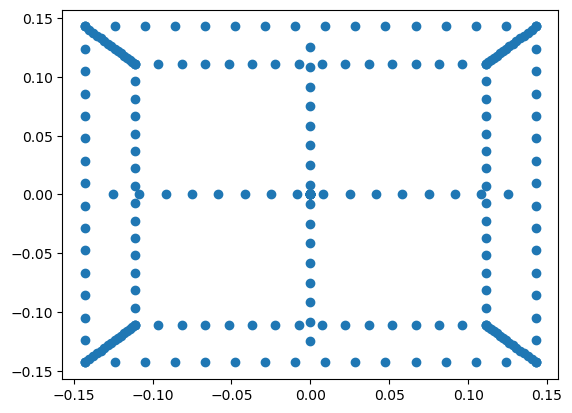

In [15]:
#Exercise 1.13

'''
Now lets us make our “camera”. Create a function projectpoints, that takes as inputs:
• the camera matrix K
• the pose of the camera (R, t)
• a 3 × n matrix (Q), representing n points in 3D to be projected into the camera.
The function should return the projected 2D points as a 2 × n matrix.
Test your function Q = box3d,
Tip: You can do matrix multiplication in Numpy using @, for example A@b.
'''

#Camera matrix
K = np.diag([1,1,1])
R = K
t = np.array([0,0,4]).reshape(-1,1)
Q = box3d()

def projectpoints(K, R, t, Q):

    Rt = np.hstack((R,t))
    ph = PiInv(Q)
    P = K @ (Rt@ph)
    return Pi(P)

p = projectpoints(K,R,t,Q)
plt.scatter(p[0], p[1])


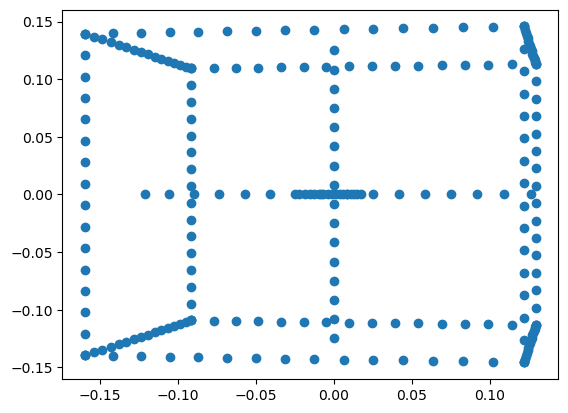

In [6]:
#Exercise 1.14

theta = 30
R = np.array([[np.cos(theta), 0, np.sin(theta)],
              [0,1,0],
              [-np.sin(theta), 0, np.cos(theta)]])

p = projectpoints(K,R,t,Q)
plt.scatter(p[0], p[1])


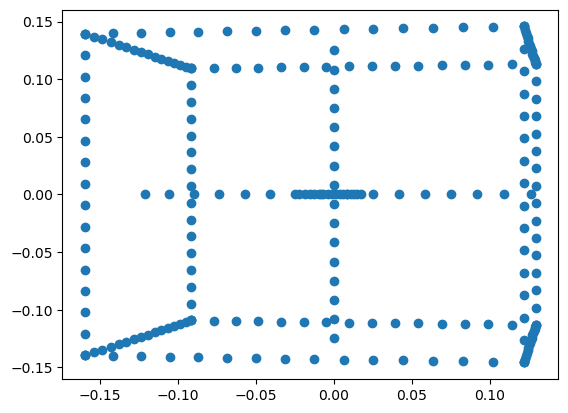

In [7]:
#Exercise 1.15
t = np.array([0,0,4]).reshape(-1,1)
p = projectpoints(K,R,t,Q)
plt.scatter(p[0], p[1])


## Week 2

Sensor width: 10.472241348910547
Sensor height: 0.0
Resolution in pixels: 0.0
Number of points outside:  20


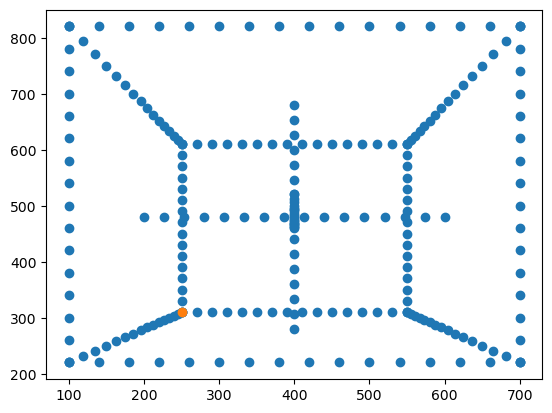

In [8]:
#Exercise 2.1

I = np.diag(np.ones(3))
R = I
t = np.array([0, 0.2, 1.5]).reshape(-1,1)

f = 600
alpha = 1
beta = 0
dx = 400
dy = 400

P1 = np.array([-0.5, -0.5, 0.5]).reshape(-1,1)

K = np.array([[f, beta*f, dx],
              [0, alpha*f, dy],
              [0,0,1]])

# pixels resolution
# Calculate sensor width and height
sensor_width = 2 * f * np.tan(np.deg2rad(alpha / 2))
sensor_height = 2 * f * np.tan(np.deg2rad(beta / 2))

# Calculate resolution
resolution_x = sensor_width / dx
resolution_y = sensor_height / dy
resolution = resolution_x * resolution_y

print("Sensor width:", sensor_width)
print("Sensor height:", sensor_height)
print("Resolution in pixels:", resolution)

#Projections of Q
q = projectpoints(K,R,t,Q)
plt.scatter(q[0], q[1])

print("Number of points outside: ",\
sum(np.logical_or(q[1] > 800, q[0] > 800)))

#Projection of P1
projected_p1= projectpoints(K,R,t,P1)
plt.scatter(projected_p1[0], projected_p1[1]) 

In [9]:
#Exercise 2.2

def projectpoints(K, R, t, Q, distCoeffs):

    Rt = np.hstack((R,t))
    ph = PiInv(Q)

    q= K @ (Rt@ph)
 
    # Apply distortion model
    r_sq = q[0]**2 + q[1]**2

    distortion = 1 + np.sum([k * r_sq**(i+1) for i, k in enumerate(distCoeffs)], axis=0)
    q[0] *= distortion
    q[1] *= distortion

    return Pi(q)

# What are the distortion coefficients in this case? -0.2

# Where does the corner P 1 project to?
Q = box3d()
q = projectpoints(K,R,t,Q)
plt.scatter(q[0], q[1])

TypeError: projectpoints() missing 1 required positional argument: 'distCoeffs'

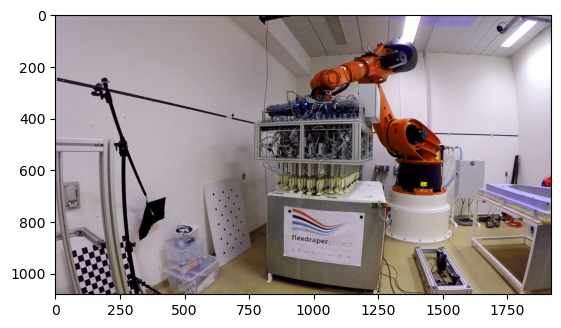

In [58]:
# Load the image
image_path = "gopro_robot.jpg"
im = cv2.imread(image_path)[:,:,::-1]
height, width, _ = im.shape

#np.shape => (height, width, depth)

plt.imshow(im)

f = 0.455732 * width
k3 = 0.245031
k5 = 0.071524
k7 = 0.00994978

# Define the intrinsic parameters
focal_length = 0.455732 * width
principal_point = (width / 2, height / 2)  # Assuming principal point at the center of the image
alpha = beta = 1  # Reasonable guess for alpha and beta
s = 0  # Assuming no skew

# Define distortion coefficients
dist_coeffs = np.array([-0.245031, 0.071524, -0.00994978])

# Construct the camera matrix K
K = np.array([[focal_length, s, principal_point[0]],
              [0, focal_length, principal_point[1]],
              [0, 0, 1]])

print("Camera matrix K:")
print(K)
